C:\Users\user\AppData\Local\Temp\ipykernel_350356\1645043413.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', np.nan, inplace=True)


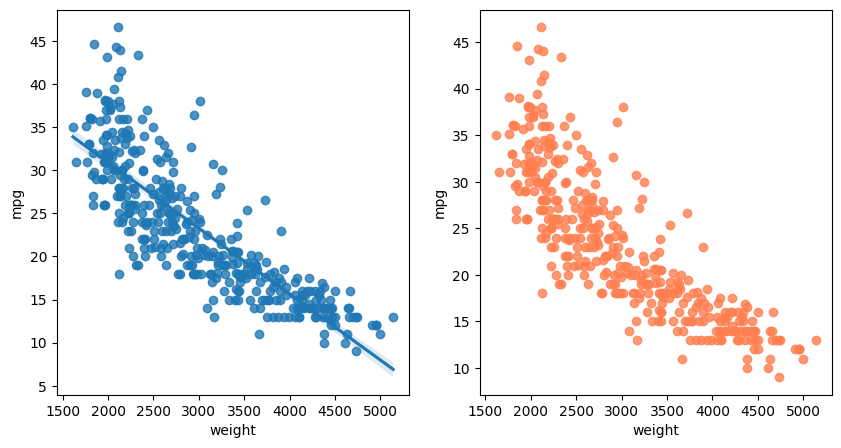

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header=None)   

df.columns = ['mpg', 'cylinders', 'displacemnt', 'horsepower', 'weight', 'acceleration', 
              'model year', 'origin', 'name']

# print(df.head())
# print('\n')

# pd.set_option('display.max_columns', 10)
# print(df.head())

# print(df.info())
# print('\n')

# print(df.describe())

# print(df['horsepower'].unique())
# print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

# print(df.describe())

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
# plt.show()
# plt.close()

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False, color='coral')
plt.show()
plt.close()

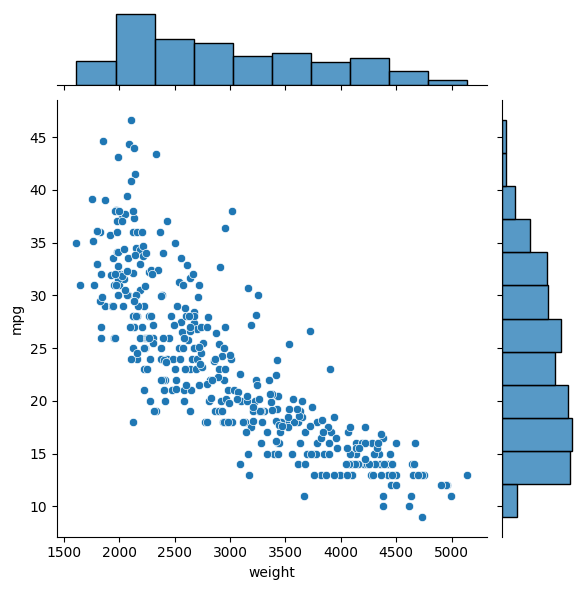

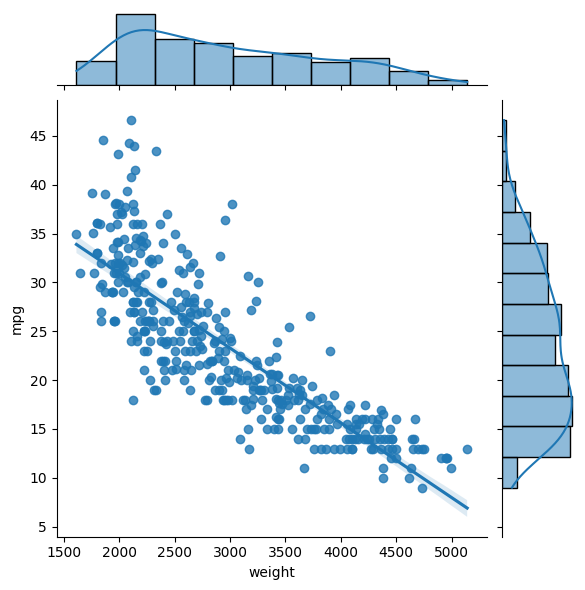

In [12]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)
plt.show()
plt.close()

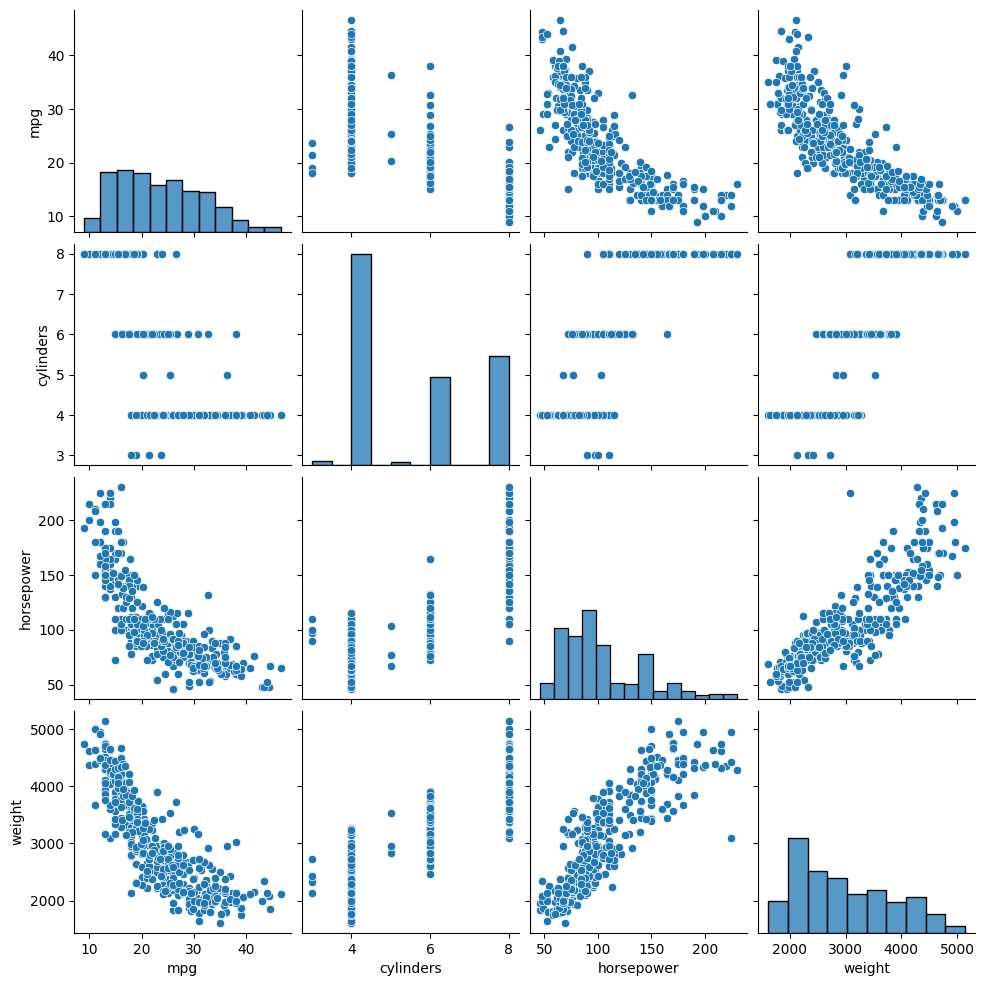

In [13]:
grid_ndf = sns.pairplot(ndf)
plt.show()
plt.close()

In [14]:
X = ndf[['weight']]
y = ndf[['mpg']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

r_square = lr.score(X_test, y_test)
print(r_square)

0.6822458558299325


In [16]:
print('기울기 a: ', lr.coef_)
print('\n')

print('y 절편 b', lr.intercept_)

기울기 a:  [[-0.00775343]]


y 절편 b [46.71036626]


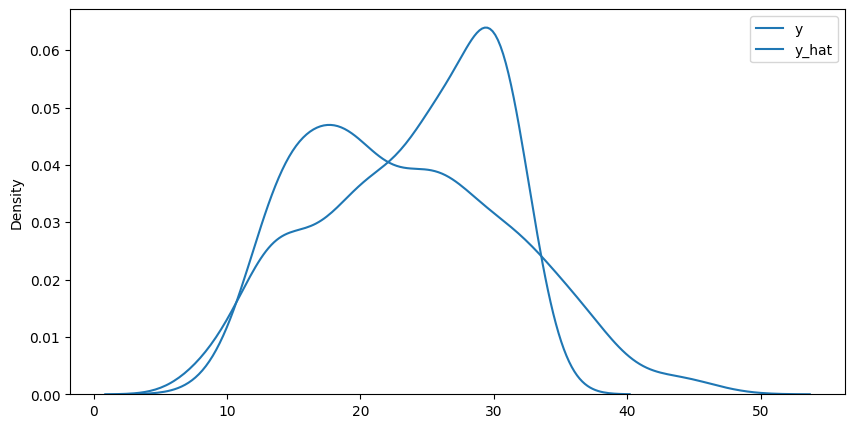

In [20]:
y_hat = lr.predict(X)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('auto-mpg.csv', header=None)


df.columns = ['mpg', 'cylinders', 'displacemnt', 'horsepower', 'weight', 'acceleration', 
              'model year', 'origin', 'name']

df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print('훈련 데이터: ', X_train.shape)   
print('검증 데이터: ', X_test.shape)    

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)


C:\Users\user\AppData\Local\Temp\ipykernel_350356\3402135209.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace('?', np.nan, inplace=True)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)


원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)


In [25]:
pr = LinearRegression()
pr.fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test)
print(r_square)

0.7087009262975688


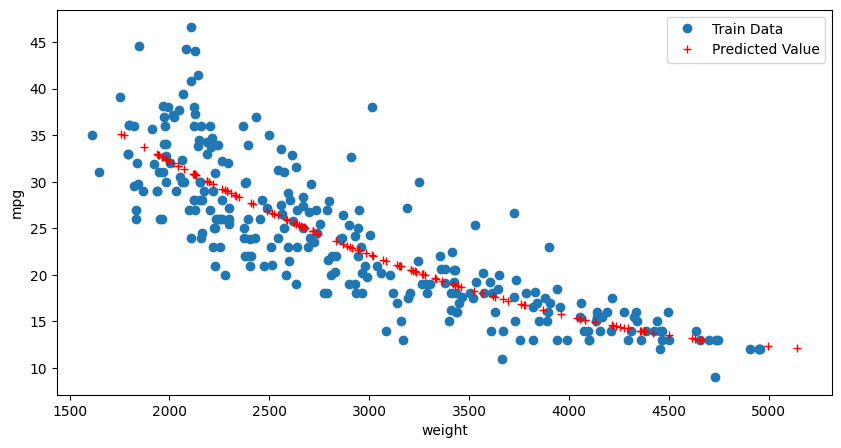

In [31]:
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label="Train Data")
ax.plot(X_test, y_hat_test, 'r+', label="Predicted Value")
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

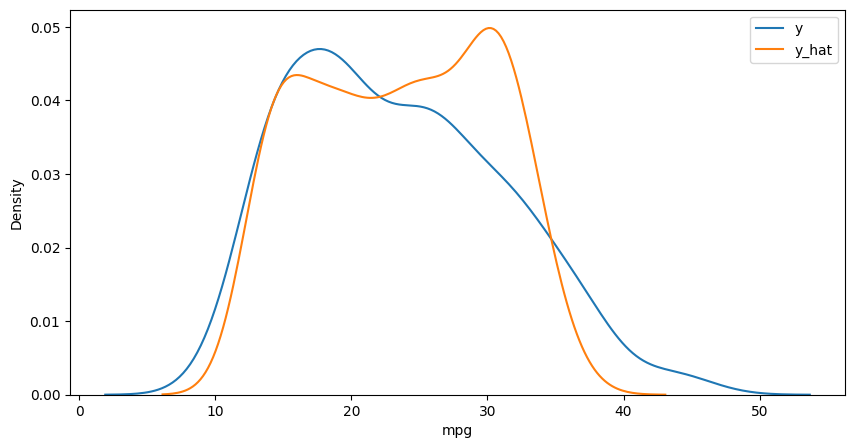

In [32]:
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()